# Create a linear model

In this basic example we are going to create a global approximation of a model response using linear model approximation.

Here

$$h(x,y) = [2 x + 0.05 * \sin(x) - y]$$

In [1]:
from __future__ import print_function
import openturns as ot
try:
    get_ipython()
except NameError:
    import matplotlib
    matplotlib.use('Agg')
from openturns.viewer import View
import numpy as np
import matplotlib.pyplot as plt

Hereafter we generate data using the previous model. We also add a noise: 

In [2]:
ot.RandomGenerator.SetSeed(0)
distribution = ot.Normal(2)
distribution.setDescription(["x","y"])
func = ot.SymbolicFunction(['x', 'y'], ['2 * x - y + 3 + 0.05 * sin(0.8*x)'])
input_sample = distribution.getSample(30)
epsilon = ot.Normal(0, 0.1).getSample(30)
output_sample = func(input_sample) + epsilon

Let us run the linear model algorithm using the `LinearModelAlgorithm` class & get its associated result :

In [3]:
algo = ot.LinearModelAlgorithm(input_sample, output_sample)
result = ot.LinearModelResult(algo.getResult())

Now we got the result, we can perform a postprocessing analysis. We use `LinearModelAnalysis` for that purpose: 

In [4]:
analysis = ot.LinearModelAnalysis(result)
print(analysis)

Basis( [[x,y]->[1],[x,y]->[x],[x,y]->[y]] )

Coefficients:
           | Estimate    | Std Error   | t value     | Pr(>|t|)    |
--------------------------------------------------------------------
[x,y]->[1] | 2.99847     | 0.0204173   | 146.859     | 9.82341e-41 |
[x,y]->[x] | 2.02079     | 0.0210897   | 95.8186     | 9.76973e-36 |
[x,y]->[y] | -0.994327   | 0.0215911   | -46.0527    | 3.35854e-27 |
--------------------------------------------------------------------

Residual standard error: 0.11048 on 27 degrees of freedom
F-statistic: 5566.3 ,  p-value: 0
---------------------------------
Multiple R-squared   | 0.997581 |
Adjusted R-squared   | 0.997401 |
---------------------------------

---------------------------------
Normality test       | p-value  |
---------------------------------
Anderson-Darling     | 0.456553 |
Cramer-Von Mises     | 0.367709 |
Chi-Squared          | 0.669183 |
Kolmogorov-Smirnov   | 0.578427 |
---------------------------------



It seems that the linear hypothesis could be accepted. Indeed, `R-Squared` value is nearly `1`. Also the adjusted value (taking into account the datasize & number of parameters) is similar to `R-Squared`. 

Also, we notice that both `Fisher-Snedecor` and `Student` p-values detailled above are less than 1%. This ensure the quality of the linear model.

We complete this analysis using some usefull graphs :

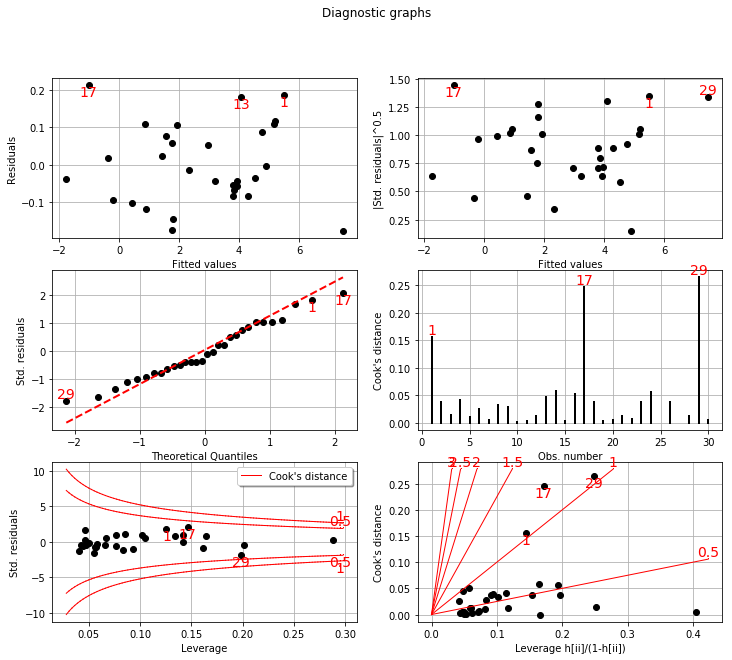

In [5]:
fig = plt.figure(figsize=(12,10))
for k, plot in enumerate(["drawResidualsVsFitted", "drawScaleLocation", "drawQQplot",
             "drawCookDistance", "drawResidualsVsLeverages", "drawCookVsLeverages"]):
    graph = getattr(analysis, plot)()
    ax = fig.add_subplot(3, 2, k + 1)
    v = View(graph, figure=fig, axes=[ax])
_ = v.getFigure().suptitle("Diagnostic graphs")

These graphics help asserting the linear model hypothesis. Indeed :
 
 - Quantile-to-quantile plot seems accurate
 
 - We notice heteroscedasticity within the noise
 
 - It seems that there is no outlier

Finally we give the intervals for each estimated coefficient (95% confidence interval):

In [6]:
alpha = 0.05
sigma_conf_int = ot.Student(analysis.getDegreesOfFreedom()).computeQuantile(alpha/2.0, True)
lower_sample = analysis.getCoefficientsEstimates() - analysis.getCoefficientsStandardErrors() * sigma_conf_int
upper_sample = analysis.getCoefficientsEstimates() + analysis.getCoefficientsStandardErrors() * sigma_conf_int

In [7]:
# lower and upper bounds as Point
# interval confidence bounds
interval = ot.Interval(lower_sample.asPoint(), upper_sample.asPoint())
print("confidence intervals with level=%1.2f : %s" % (1 - alpha, interval))

confidence intervals with level=0.95 : [2.95657, 3.04036]
[1.97751, 2.06406]
[-1.03863, -0.950026]
